#Data Visualization Project 

### Prem (20181COM0115)


## heart data set info
###### cp: chest pain type X
####value 0: typical angina
####Value 1: atypical angina
####Value 2: non-anginal pain
####Value 3:asymptomatic
_______________________________________________________________
### trestbps - 
##### resting blood pressure (in mm Hg on admission to the hospital)
_______________________________________________________________________
### chol means Cholesterol
#### less the 150 is good 
#### okok =150 to 199
#### hight =200 to 499  
#### very high >=500
________________________________________________________________________
####fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
______________________________________________________________________
####restecg: resting electrocardiographic results
#### Value 0: normal
####Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#### Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
_______________________________________________________________________
#### exang: exercise induced angina (1 = yes; 0 = no)
_______________________________________________________________________
#### slope: the slope of the peak exercise ST segment
####-- Value 1: upsloping
####-- Value 2: flat
####-- Value 3: downsloping
_______________________________________________________________________
#### ca: number of major vessels (0-3) colored by flourosopy
_______________________________________________________________________
#### thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
_______________________________________________________________________
### num: diagnosis of heart disease (angiographic disease status)
###-- Value 0: < 50% diameter narrowing
###-- Value 1: > 50% diameter narrowing


####age - age in years
####sex - (1 = male; 0 = female)
####cp - chest pain type
####trestbps - resting blood pressure (in mm Hg on admission to the hospital)
####chol - serum cholestoral in mg/dl
####fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
####restecg - resting electrocardiographic results
####thalach - maximum heart rate achieved
####exang - exercise induced angina (1 = yes; 0 = no)
####oldpeak - ST depression induced by exercise relative to rest
####slope - the slope of the peak exercise ST segment
####ca - number of major vessels (0-3) colored by flourosopy
####thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
####target - have disease or not (1=yes, 0=no)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#df = pd.read_csv("/content/heart.csv")
#df.head()
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:

df['sex'].replace([0,1],['Female','Male'],inplace=True)
df['fbs'].replace([0,1],['False','True'],inplace=True)
df['exang'].replace([0,1],['doesnt Exercise','does Exercise'],inplace=True)
df['target'].replace([0,1],['dont have disease','have disease'],inplace=True)
df["cp"].replace([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],inplace=True)
df[["age","sex","cp","fbs","exang","target"]].head()

,age,sex,cp,fbs,exang,target
0,63,Male,asymptomatic,True,doesnt Exercise,have disease
1,37,Male,non-anginal pain,False,doesnt Exercise,have disease
2,41,Female,atypical angina,False,doesnt Exercise,have disease
3,56,Male,atypical angina,False,doesnt Exercise,have disease
4,57,Female,typical angina,False,does Exercise,have disease


### non tech ppl can understand by looking at the above dataframe


In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
a=df.describe()
a.T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# **observations:**
###the age of the patient varies from 29 to 77 with the mean of 54.366 
###although  the maximum no of cp observed is 3 nearly 75 per of the patients have 2 per of disease and nearly 25 per have no disease in cp 



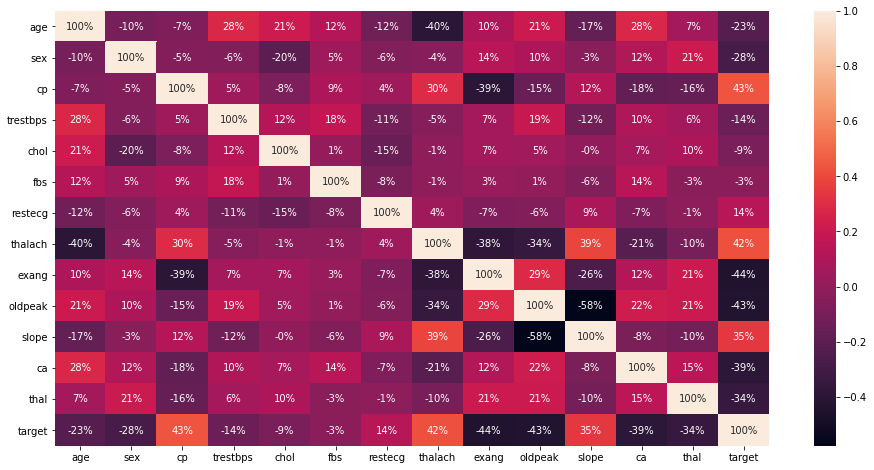

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

# **observations:**
###slope and oldpeak are weakly correlated
###cp is the most important feature to the target variable
###exang is the least important feature to the target variable

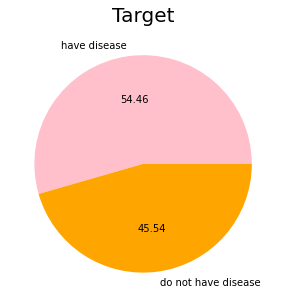

In [ ]:
target=df["target"].value_counts()
plt.figure(figsize=(6,5))
lab=["have disease","do not have disease"]
col=["pink","orange"]
plt.pie(target,autopct="%.2f",labels=lab,colors=col)
plt.title("Target",size=20)
plt.show()


# **observations:**
### The above graph depicts that 54.46% (that is 165) people have heart disease, while 45.54% (that is 138) doesn't.

Male      207
Female     96
Name: sex, dtype: int64


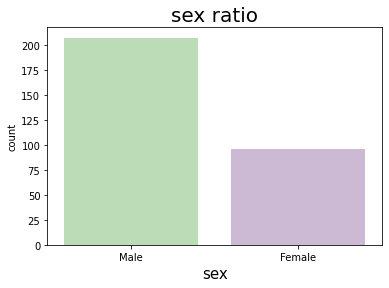

In [ ]:
print(df["sex"].value_counts())
sns.countplot(x="sex",data=df,palette="PRGn_r")
plt.xlabel("sex",size=15)
plt.title("sex ratio",size=20)
plt.show()

### **This graph concludes that male are more likely to have heart disease, than female.**

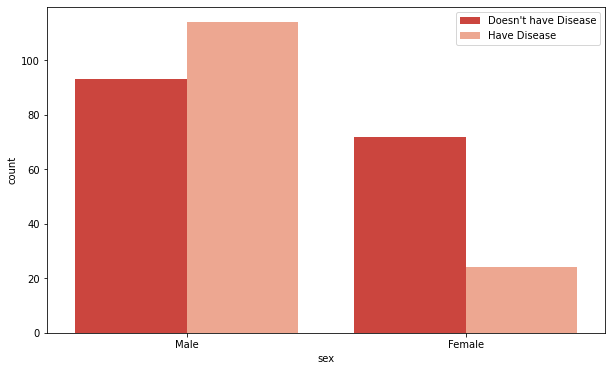

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",data=df,hue="target",palette="Reds_r")
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.show()


# **observations:**
### In case of male the chances of getting heart disease is maximum, while incase of female its minimum.
### The above graphs shows the probability of getting disease with respective to sex.

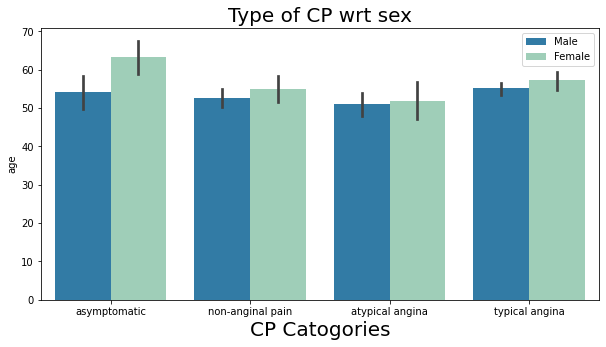

In [ ]:
plt.figure(figsize=(10,5))

lab=("CP Catogories")
sns.barplot(x="cp",y="age",hue="sex",data=df,palette ='YlGnBu_r', estimator = np.mean).set_title("Type of CP wrt sex",size=20)
plt.xlabel(lab,size=20)
plt.legend(loc='best')
plt.show()

**Asymptomatic Chest pain is seen more in people, especially in female. we can also infer that females are mostly targetted in case of chest pains.**

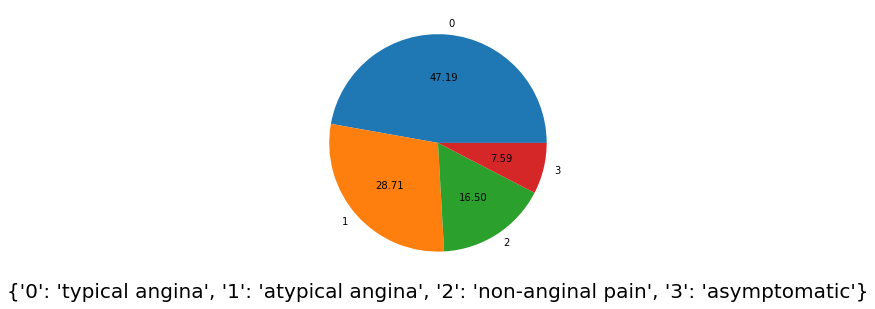

In [ ]:
plt.figure(figsize=(10,5))
lab={"0":"typical angina","1":"atypical angina","2":"non-anginal pain","3":"asymptomatic"}
plt.pie(df.cp.value_counts(),autopct="%.2f",labels=lab)
plt.xlabel(lab,size=20)
plt.show()

# **observations:**
###47.19    per of people have type 0 chest pain which is typical angina 
###28.71    per of people have type 1 chest pain which is atypical angina
###16.5     per of people have type 2 chest pain which is non-anginal angina
###7.59     per of the people have type 3 chest pain which is asymptomatic

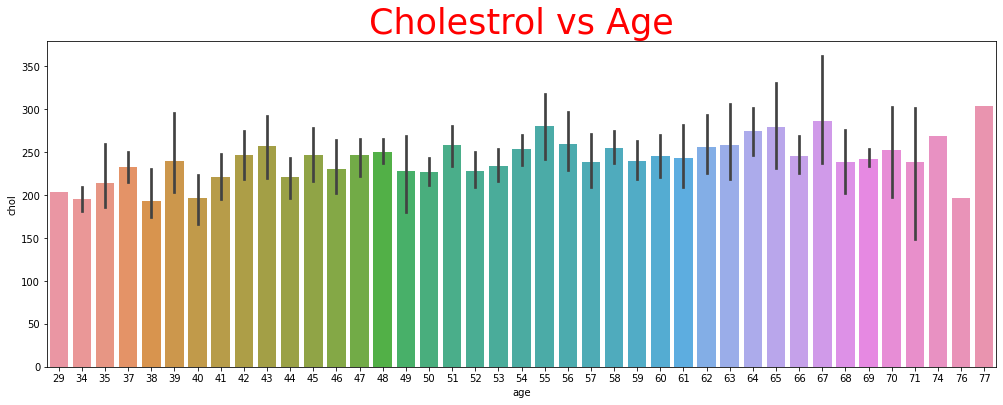

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=df,x="age",y="chol")
plt.title("Cholestrol vs Age",color="red",size=35)
plt.show()

We can see the peak rising at the age of 67, which says that people at the age of 67 have more cholestrol compared at other ages.
we can also see the continues increase in the cholestrol from the age 59

In [ ]:
good=[]
high=[]
veryhigh=[]
worst=[]
chol=df["chol"]
age=df["age"]
for i in chol:
  if i<=150:
    good.append(i)
  if i>150 and i<=199:
    high.append(i)
  if i>=200 and i<=499:
    veryhigh.append(i)
  if i>=500:
    worst.append(i)
print("good= ",good)
print("high= ",high)
print("veryhigh= ",veryhigh)

print("worst= ",worst)


good=  [141, 126, 149, 149, 131]
high=  [192, 199, 168, 199, 175, 197, 198, 177, 177, 182, 186, 183, 197, 160, 195, 196, 193, 199, 196, 178, 197, 180, 197, 192, 157, 175, 175, 167, 177, 172, 188, 185, 197, 164, 188, 177, 174, 198, 184, 166, 169, 187, 197, 176, 193]
veryhigh=  [233, 250, 204, 236, 354, 294, 263, 239, 275, 266, 211, 283, 219, 340, 226, 247, 239, 234, 233, 226, 243, 302, 212, 417, 219, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321, 325, 235, 257, 216, 234, 256, 302, 231, 252, 201, 222, 260, 303, 265, 309, 203, 211, 222, 234, 220, 209, 258, 227, 204, 261, 213, 250, 245, 221, 205, 240, 250, 308, 318, 298, 265, 277, 214, 248, 255, 207, 223, 288, 226, 394, 233, 315, 246, 244, 270, 240, 211, 234, 236, 244, 254, 325, 313, 211, 262, 215, 214, 204, 243, 303, 271, 268, 267, 210, 204, 277, 269, 201, 271, 295, 235, 306, 269, 208, 201, 263, 295, 303, 209, 223, 245, 242, 240, 226, 228, 227, 278, 220, 253, 220, 221, 240, 342, 286, 229, 268, 254, 203, 256, 229, 284, 224, 206, 23

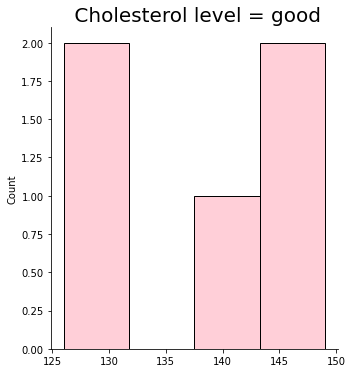

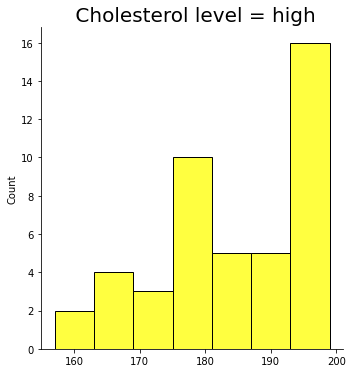

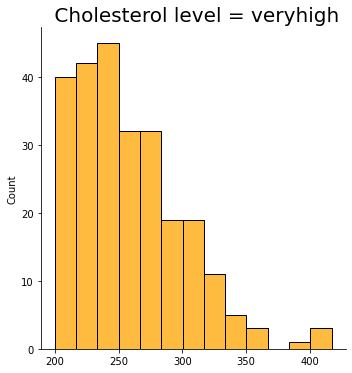

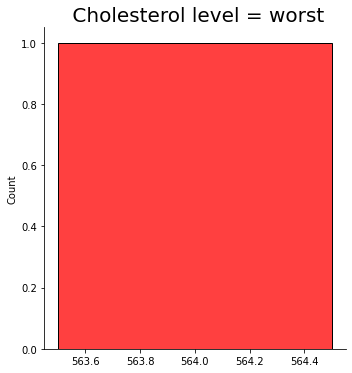

In [ ]:

sns.displot(data=good,color="pink")
plt.title(" Cholesterol level = good",size=20)
#level is <=150

sns.displot(high,color="yellow")
plt.title(" Cholesterol level = high",size=20)
#level is >=200

sns.displot(veryhigh,color="orange",)
plt.title(" Cholesterol level = veryhigh",size=20)
#level is <=499

sns.displot(worst,color="red")
plt.title(" Cholesterol level = worst",size=20)
#level is >500

plt.show()
#there are more case of cholesterol level from 200 to 400

# **observations:**
The above four graphs shows different catogories based on Cholestrol level:

> Indented block



**GOOD**: This catogory ranges from 125 to 150, where the maximum count of people with maximum cholestrol level is 2.

**HIGH**: This catogory ranges from 160 to 200, where the maximum count of people with maximum cholestrol level is 16.

**VERY HIGH**: This catogory ranges from 200 to 400, where the maximum count of people with maximum cholestrol level is 45.

**WORST**: Here the chlestrol level is more than 500, there is only one person with worst condition with cholestrol level of 564

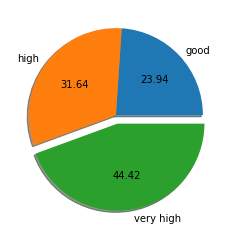

In [ ]:
#plt.pie(x=[len(good),len(high),len(veryhigh)],autopct="0.0%f")
plt.pie(x=[np.mean(good),np.mean(high),np.mean(veryhigh)],
        labels=["good","high","very high"],
        explode=[0.0,0.0,0.1],
        autopct='%.2f',
        shadow=True)

plt.show()

# **observations:**
Maximum people are having very high cholestrol level, that ranges 


between 200 to 400.

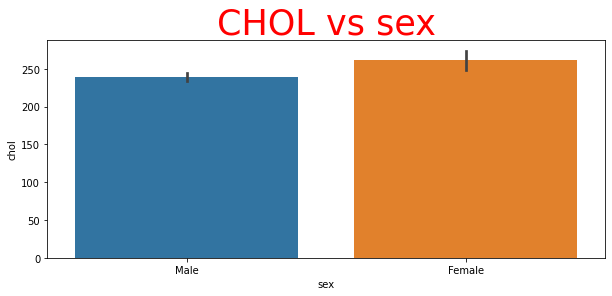

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x="sex",y="chol")
plt.title("CHOL vs sex",color="red",size=35)
plt.show()
#cholestrol level of female is more the male
#let us go in detail since we cant make out properly

**Female have more cholestrol when compared to male.**

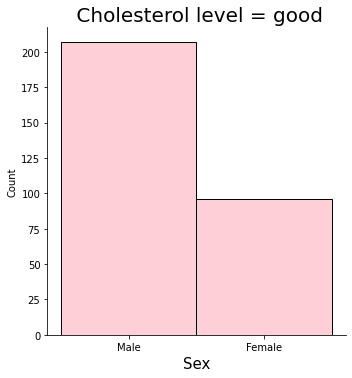

In [ ]:
sns.displot(data=good,x=df.sex,color="pink")
plt.title(" Cholesterol level = good",size=20)
plt.xlabel("Sex",size=15)

plt.show()

**Male has better cholestrol level compared to female.**

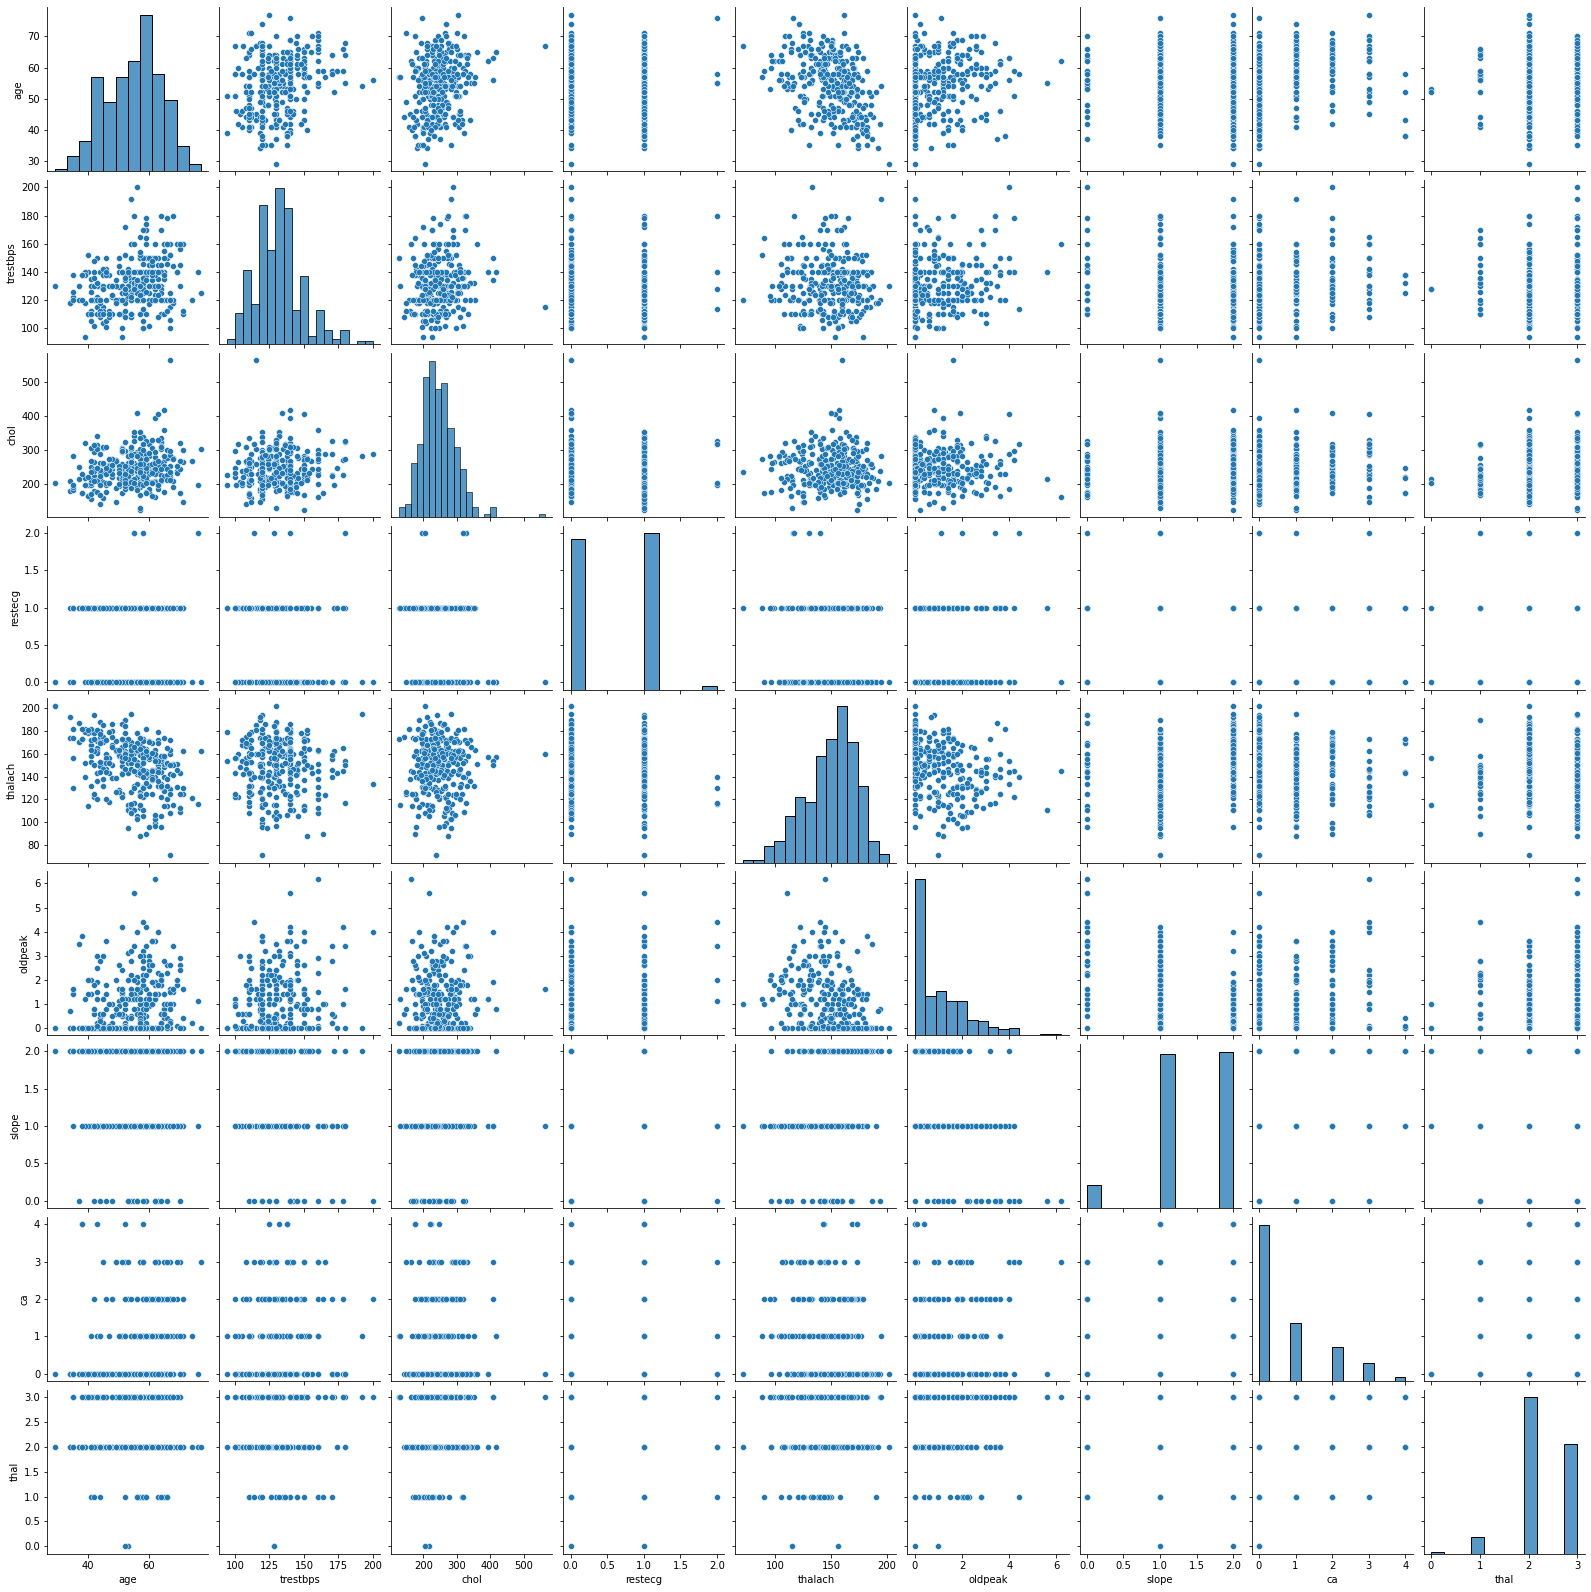

In [ ]:
sns.pairplot(df)


in the above pair plot we can clearly observe age vs trestbps,thalach are positievly correlated, where as rest of the points in the plots are overlapped

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


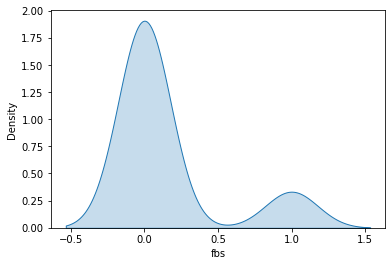

In [ ]:
sns.kdeplot(df1.fbs, bw=0.5, label="bw: 0.5", shade=True);

# **observations:**
the distribution of fbs of all people so the peak observation is at the density of 1.90 and fbs at that level is 0, so we can infer that most of the people have fbs as 0
[ ]


**shows  the distribution of fbs of all people**

**Even if the Fasting Blood Sugar shows false, people are more likely to have disease**

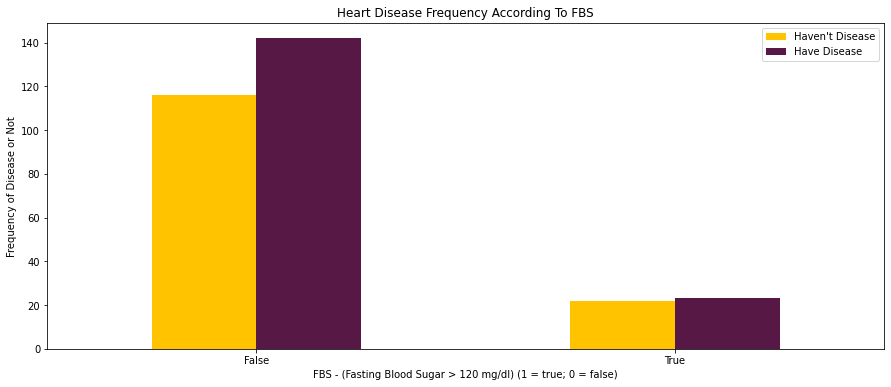

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

**it seems like people who have fbs<120 have higher chance of getting heart disease**

Text(0.5, 1.0, 'Fasting blood sugar chart')

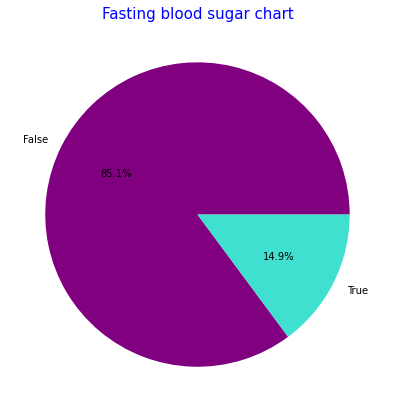

In [ ]:
 
labels=df.fbs.value_counts().index
colors=["purple","turquoise"]
explode=[0,0]
sizes=df.fbs.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('Fasting blood sugar chart',color="blue",fontsize=15)
#fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#85.1 percent dont have fbs above 120 mg/dl
#14.9 per have gbs above 120mg

**only 14.9 (That is 45) are having Fasting Blood Sugar(fds).**

### people who are not doing exercise are more prone to have heart disease

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df1, x='age', y='sex', z='exang',color='target',size='fbs',size_max=25)
fig.show()

by the above 3D plot we can infer that most of the heart disease people have been directly related by the age because most of the people got heart disease due to the increase in thier age , so we can conclude that age is the important parameter here 

#**conclusion :**
##After EDA
###According to our analysis
###**1:** male have less heart disease and low cholesterol compare to female
###**2:** Since we are going to be future data scientist so let's be a bit specific.Male, who does exercise have low cholesterol level and proportionally having no heart disease.
###**3:** On other hand people who doesn't do exercise are more tend to have heart diseases.
###**4:** Chest pain is mostly targeted at females compared to male.
###**5:** the highest cholesterol level recorded is 564. which is male which is an exceptional